<a href="https://colab.research.google.com/github/GGlivePh/PLF/blob/main/selras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/GGlivePh/PLF.git

Cloning into 'PLF'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 49 (delta 18), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 6.18 MiB | 5.30 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [2]:
import os
os.chdir('PLF')

In [3]:
import os
import pandas as pd

In [4]:
# Use pd.read_excel to read the Excel file
data1 = pd.read_excel('all_phenotype_data_cleaned.xlsx')

In [5]:
data1

,UID,Weight_g,Length_mm,Width_mm,Height_mm,Lpic✔,Dpic✔,Rpic✔,Vpic✔,Tissue✔,boxID,sex (F/M),Viscera_wt,fillet_wt_g,OBS,Notes
0,2024-10-07_0001,1200.0,44.5,62.5,95.6,NaN,NaN,NaN,NaN,NaN,1,M,101.2,761.1,TORSTEN,NaN
1,2024-10-07_0002,1400.0,46.0,64.9,95.0,NaN,NaN,NaN,NaN,NaN,1,F,152.0,918.0,OKSANA,NaN
2,2024-10-07_0003,1370.0,45.5,71.0,100.5,NaN,NaN,NaN,NaN,NaN,1,M,106.7,878.7,TORSTEN,BAD TAIL/ BENT
3,2024-10-07_0004,1673.0,48.7,80.0,110.0,NaN,NaN,NaN,NaN,NaN,1,M,196.0,1058.0,OKSANA,NaN
4,2024-10-07_0005,1436.0,47.5,80.0,100.4,NaN,NaN,NaN,NaN,NaN,1,F,129.2,917.7,TORSTEN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,2025-01-14_0096,1510.0,47.5,73.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,M,150.0,995.2,T,DEF
770,2025-01-14_0097,1236.0,41.2,65.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,F,134.0,724.0,S,DEF
771,2025-01-14_0098,1161.0,43.0,61.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,M,133.6,740.4,T,DEF
772,2025-01-14_0099,1085.0,43.5,60.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,F,143.0,672.1,T,DEF


<ipython-input-13-88663e0cd85c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data1, x='Length_mm', y='sex (F/M)', inner='box', palette='Dark2')


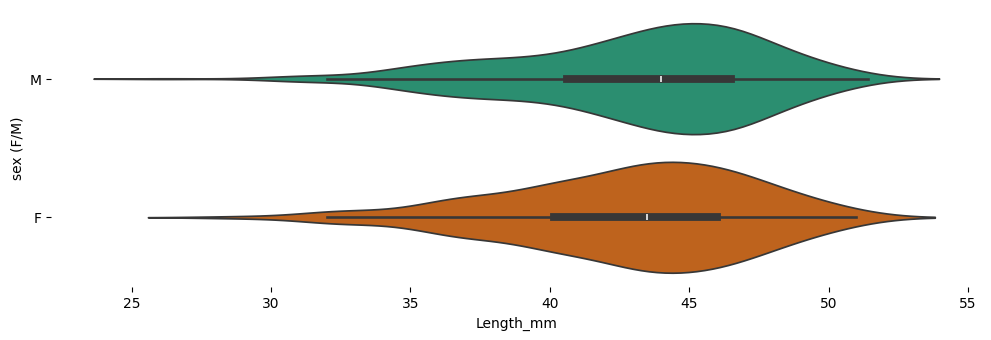

In [13]:
# @title sex (F/M) vs Length_mm

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data1['sex (F/M)'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data1, x='Length_mm', y='sex (F/M)', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [12]:
# prompt: Using dataframe data1: plot fillet versus weight

import altair as alt

# Create a scatter plot of fillet_wt_g versus Weight_g
chart = alt.Chart(data1).mark_point().encode(
    x='Weight_g',
    y='fillet_wt_g'
)

chart

alt.Chart(...)

<ipython-input-9-5e65321509a7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data1, x='Weight_g', y='sex (F/M)', inner='box', palette='Dark2')


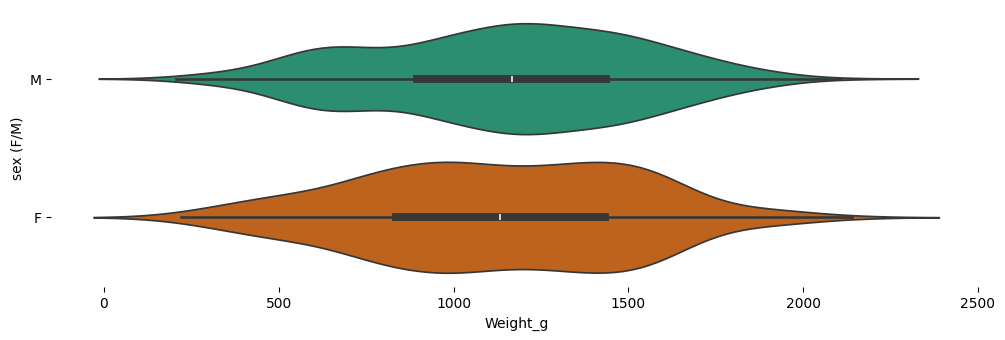

In [9]:
# @title sex (F/M) vs Weight_g

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data1['sex (F/M)'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data1, x='Weight_g', y='sex (F/M)', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

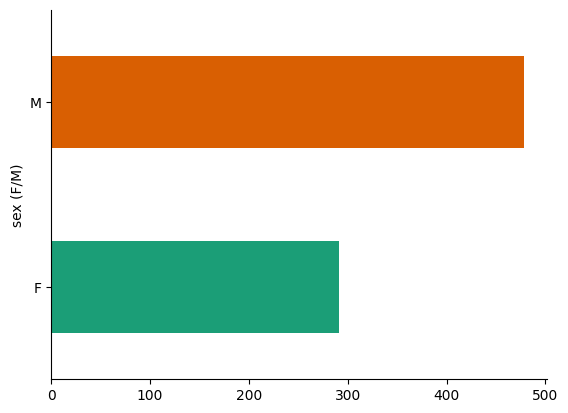

In [8]:
# @title sex (F/M)

from matplotlib import pyplot as plt
import seaborn as sns
data1.groupby('sex (F/M)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

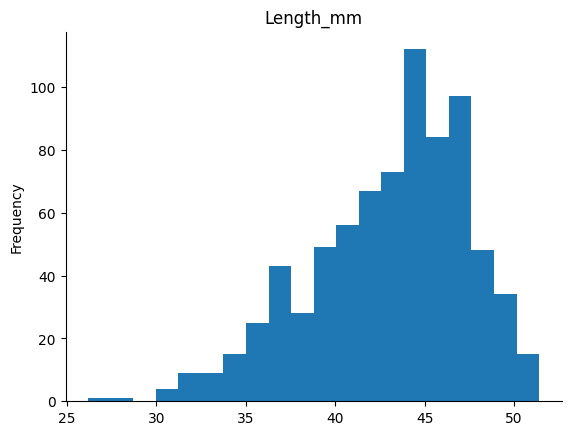

In [7]:
# @title Length_mm

from matplotlib import pyplot as plt
data1['Length_mm'].plot(kind='hist', bins=20, title='Length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import files
!git clone https://github.com/GGlivePh/PLF.git
os.chdir('PLF')
# Use pd.read_excel to read the Excel file
data1 = pd.read_excel('all_phenotype_data.xlsx')


def detect_outliers(data, columns, method='iqr', threshold=1.5):
    """
    Detects outliers in the specified columns of a DataFrame using the specified method.

    Args:
        data: pandas DataFrame containing the data.
        columns: List of columns to check for outliers.
        method: Outlier detection method ('iqr' or 'zscore'). Defaults to 'iqr'.
        threshold: Threshold for outlier detection. Defaults to 1.5.

    Returns:
        DataFrame with a new column 'is_outlier' indicating if a record is an outlier
        and a column 'outlier_variable' specifying the variable suspected to be an outlier.
    """

    data['is_outlier'] = False  # Initialize outlier column
    data['outlier_variable'] = ''  # Initialize outlier variable column

    for col in columns:
        if method == 'iqr':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            # Assign the column name to outlier_variable for each outlier
            data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), 'is_outlier'] = True
            data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), 'outlier_variable'] = col
        elif method == 'zscore':
            z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
            data.loc[z_scores > threshold, 'is_outlier'] = True
            data.loc[z_scores > threshold, 'outlier_variable'] = col

        # Report outliers for the current column
        outliers = data[data['is_outlier'] == True][col]
        if len(outliers) > 0:
            print(f"Column '{col}' has {len(outliers)} potential outliers:")
            #print(outliers) # Uncomment to print the outlier values
            print("-" * 20)

    return data


# Columns to check for outliers
columns_to_check = ['Weight_g', 'Length_mm', 'Width_mm', 'Height_mm', 'Viscera_wt', 'fillet_wt_g']

# Detect outliers using IQR method
data_with_outliers = detect_outliers(data1, columns_to_check, method='iqr')

# Detect outliers using Z-score method (optional)
# data_with_outliers_zscore = detect_outliers(data1, columns_to_check, method='zscore', threshold=3)
# Detect outliers using IQR method
data_with_outliers = detect_outliers(data1, columns_to_check, method='iqr')

# Create a new DataFrame with only the outliers
outliers_df = data_with_outliers[data_with_outliers['is_outlier'] == True]

# Save the DataFrame with outliers to an Excel file
outliers_df.to_excel('outliers_data.xlsx', index=False)

# Download the file
files.download('outliers_data.xlsx')

Cloning into 'PLF'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 6.10 MiB | 7.09 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Column 'Length_mm' has 7 potential outliers:
--------------------
Column 'Width_mm' has 9 potential outliers:
--------------------
Column 'Height_mm' has 11 potential outliers:
--------------------
Column 'Viscera_wt' has 14 potential outliers:
--------------------
Column 'fillet_wt_g' has 16 potential outliers:
--------------------
Column 'Length_mm' has 7 potential outliers:
--------------------
Column 'Width_mm' has 9 potential outliers:
--------------------
Column 'Height_mm' has 11 potential outliers:
--------------------
Column 'Viscera_wt' has 14 potential outliers:
--------------------
Column 'fillet_wt_g' has 16 potential outliers:
--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: add small code which also flags records where Fillet_wt_g is more than Weight_g and where Viscera_wt is greater than Fillet_wt_g and include them in the flagged list along with a note on the "outlier_variable" column

import os
import pandas as pd
import numpy as np
from google.colab import files
!git clone https://github.com/GGlivePh/PLF.git
os.chdir('PLF')
# Use pd.read_excel to read the Excel file
data1 = pd.read_excel('all_phenotype_data.xlsx')


def detect_outliers(data, columns, method='iqr', threshold=1.5):
    """
    Detects outliers in the specified columns of a DataFrame using the specified method.

    Args:
        data: pandas DataFrame containing the data.
        columns: List of columns to check for outliers.
        method: Outlier detection method ('iqr' or 'zscore'). Defaults to 'iqr'.
        threshold: Threshold for outlier detection. Defaults to 1.5.

    Returns:
        DataFrame with a new column 'is_outlier' indicating if a record is an outlier
        and a column 'outlier_variable' specifying the variable suspected to be an outlier.
    """

    data['is_outlier'] = False  # Initialize outlier column
    data['outlier_variable'] = ''  # Initialize outlier variable column

    for col in columns:
        if method == 'iqr':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            # Assign the column name to outlier_variable for each outlier
            data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), 'is_outlier'] = True
            data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), 'outlier_variable'] = col
        elif method == 'zscore':
            z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
            data.loc[z_scores > threshold, 'is_outlier'] = True
            data.loc[z_scores > threshold, 'outlier_variable'] = col

        # Report outliers for the current column
        outliers = data[data['is_outlier'] == True][col]
        if len(outliers) > 0:
            print(f"Column '{col}' has {len(outliers)} potential outliers:")
            #print(outliers) # Uncomment to print the outlier values
            print("-" * 20)

    # Additional checks
    data.loc[data['fillet_wt_g'] > data['Weight_g'], 'is_outlier'] = True
    data.loc[data['fillet_wt_g'] > data['Weight_g'], 'outlier_variable'] = 'Fillet_wt_g > Weight_g'

    data.loc[data['Viscera_wt'] > data['fillet_wt_g'], 'is_outlier'] = True
    data.loc[data['Viscera_wt'] > data['fillet_wt_g'], 'outlier_variable'] = 'Viscera_wt > Fillet_wt_g'

    return data
# Assuming your data is in a DataFrame called 'data1'
# Replace 'data1' with your actual DataFrame name if different

# Columns to check for outliers
columns_to_check = ['Weight_g', 'Length_mm', 'Width_mm', 'Height_mm', 'Viscera_wt', 'fillet_wt_g']

# Detect outliers using IQR method
data_with_outliers = detect_outliers(data1, columns_to_check, method='iqr')

# Detect outliers using Z-score method (optional)
# data_with_outliers_zscore = detect_outliers(data1, columns_to_check, method='zscore', threshold=3)
# Detect outliers using IQR method
data_with_outliers = detect_outliers(data1, columns_to_check, method='iqr')

# Create a new DataFrame with only the outliers
outliers_df = data_with_outliers[data_with_outliers['is_outlier'] == True]

# Save the DataFrame with outliers to an Excel file
outliers_df.to_excel('outliers_data.xlsx', index=False)

# Download the file
files.download('outliers_data.xlsx')


Cloning into 'PLF'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 43 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 6.11 MiB | 7.09 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Column 'Length_mm' has 7 potential outliers:
--------------------
Column 'Width_mm' has 9 potential outliers:
--------------------
Column 'Height_mm' has 11 potential outliers:
--------------------
Column 'Viscera_wt' has 14 potential outliers:
--------------------
Column 'fillet_wt_g' has 16 potential outliers:
--------------------
Column 'Length_mm' has 7 potential outliers:
--------------------
Column 'Width_mm' has 9 potential outliers:
--------------------
Column 'Height_mm' has 11 potential outliers:
--------------------
Column 'Viscera_wt' has 14 potential outliers:
--------------------
Column 'fillet_wt_g' has 16 potential outliers:
--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>